In [118]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')

In [6]:
#MODIS Functions

def preprocess_chlorophyll_data(file_path, lon_min=100, lon_max=155, lat_min=-63, lat_max=-30):
    """
    Preprocesses the chlorophyll data from a CSV file. Note that data from MODIS is in mg/m3 which is equal to ug/L which is what is reported.

    Parameters:
    file_path (str): The path to the CSV file.
    lon_min (float): Minimum longitude value to keep.
    lon_max (float): Maximum longitude value to keep.
    lat_min (float): Minimum latitude value to keep.
    lat_max (float): Maximum latitude value to keep.
    replace_value (int or float): The value to replace with NaN.
    conversion_factor (float): Factor to convert the data values.

    Returns:
    pd.DataFrame: The preprocessed chlorophyll data.
    """
    # Read the CSV file
    chla_data = pd.read_csv(file_path)
    
    # Set the 'lat/lon' column as the index
    chla_data = chla_data.set_index('lat/lon')
    
    # Replace specific value with NaN
    chla_data = chla_data.replace(99999, np.nan)
    
    # Ensure columns are floats
    chla_data.columns = [float(x) for x in chla_data.columns]
    
    # Keep only the columns within the specified longitude range
    columns_to_keep = [x for x in chla_data.columns if lon_min < x < lon_max]
    chla_data = chla_data[columns_to_keep]
    
    # Keep only the rows within the specified latitude range
    chla_data = chla_data[(chla_data.index > lat_min) & (chla_data.index < lat_max)]
    
    return chla_data

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/var/folders/fr/vt6pjv5j2xd3yldcz7dyxj2c0000gn/T/ipykernel_19409/2087484628.py:16: SyntaxWarning: invalid escape sequence '\m'
  cbar.set_label('MODIS Chl a ($\mu g/L$)')


In [101]:
# files downloaded from https://neo.gsfc.nasa.gov/view.php?datasetId=MY1DMM_CHLORA&date=2024-11-24 as CSV files for excel (0.1deg resolution)

chla = preprocess_chlorophyll_data('/Users/alanahc/Documents/Conferences/Cape-K/MY1DMM_CHLORA_2024-11-01_rgb_3600x1800.SS.CSV', lon_min=100, lon_max=155, lat_min=-63, lat_max=-30)

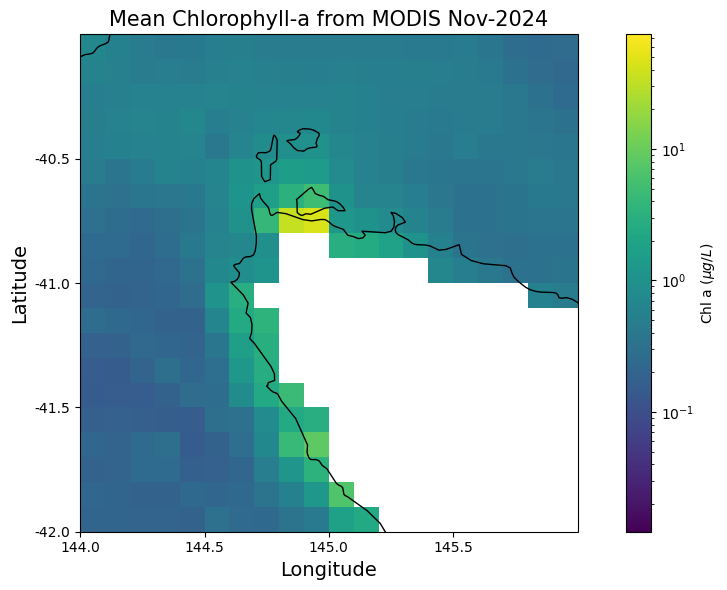

In [194]:
lon = np.array(chla.columns.values)
lat = np.array(chla.index.values)
lat_grid,lon_grid = np.meshgrid(lon, lat)
chla_values = chla.iloc[0:, 0:].values

# Define the thresholds
lon_lower_bound = 144
lon_upper_bound = 146
lat_lower_bound = -42
lat_upper_bound = -40

# Plotting with Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# plot data
cf = ax.pcolormesh(lat_grid, lon_grid, chla_values,cmap='viridis',norm=LogNorm())
plt.colorbar(cf,label='Chl a ($\mu g/L$)')

# make plot pretty 
ax.coastlines(resolution='10m')
ax.set_xticks(np.arange(lon_lower_bound,lon_upper_bound,0.5))  
ax.set_xticklabels(np.arange(lon_lower_bound,lon_upper_bound,0.5))
ax.set_yticks(np.arange(lat_lower_bound,lat_upper_bound,0.5))
ax.set_yticklabels(np.arange(lat_lower_bound,lat_upper_bound,0.5))

ax.set_xlabel("Longitude",fontsize=14)
ax.set_ylabel("Latitude",fontsize=14)
ax.set_ylim(lat_lower_bound,lat_upper_bound)
ax.set_xlim(lon_lower_bound,lon_upper_bound)
ax.set_title("Mean Chlorophyll-a from MODIS Nov-2024",fontsize=15)

plt.tight_layout()
plt.show()